In [ ]:
# ! pip install wordcloud   #for first time

In [296]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import nltk 

In [298]:
from nltk.tokenize import sent_tokenize
from nltk.corpus import inaugural   # Downlad inaugural
nltk.download('inaugural') # download the data

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\P7110289\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


True

In [369]:
inaugural.fileids()  # see the list of fields 

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

## Read specific Corpus

In [370]:
# Save data to respective variables
Roos = inaugural.raw('1941-Roosevelt.txt')
Kenn = inaugural.raw('1961-Kennedy.txt')
Nixo = inaugural.raw('1973-Nixon.txt')

In [371]:
Roosevelt = pd.DataFrame({'Speech': Roos}, index = [0])
Kennedy = pd.DataFrame({'Speech': Kenn}, index = [0])
Nixon = pd.DataFrame({'Speech': Nixo}, index = [0])

### Find the number of characters, words and sentences - Roosevelt 

In [372]:
Roosevelt['TotalCharcater'] = len(Roos)

In [373]:
roos_wos = Roos.split()
roos_char_count = []
for i in range(0, len(roos_wos)):
    roos_char_count.append(len(roos_wos[i]))
Roosevelt['Characters'] = sum(roos_char_count)

In [374]:
Roosevelt['Words']= len(roos_wos)

In [375]:
Roosevelt['No.Of_Sentence'] = Roos.count('.')

In [376]:
Roosevelt

,Speech,TotalCharcater,Characters,Words,No.Of_Sentence
0,On each national day of inauguration since 178...,7571,6174,1360,68


No. of characters (with space) in Roosevelt Data = 7571 

No. of characters (without space) in Roosevelt Data = 6174

No. of words (without space) in Roosevelt Data = 1360

No. of Sentence in Roosevelt Data = 68

### Find the number of characters, words and sentences - Kennedy

In [377]:
Kennedy['TotalCharcater'] =  len(Kenn)

In [378]:
Kennedy['Charcaters'] =  len(''.join(Kenn.split()))  # Different way of doing 

In [379]:
#kenn_wos = Kenn.split()
Kennedy['Words'] =  len(Kenn.split())

In [380]:
Kennedy['No.Of_Sentence'] = Kenn.count('.')

In [381]:
Kennedy

,Speech,TotalCharcater,Charcaters,Words,No.Of_Sentence
0,"Vice President Johnson, Mr. Speaker, Mr. Chief...",7618,6202,1390,55


No. of characters (with space) in Kennedy Data = 7618

No. of characters (without space) in Kennedy Data = 6202

No. of words (without space) in Kennedy Data = 1390

No. of Sentence in Kennedy Data = 55


### Find the number of characters, words and sentences - Nixon

In [382]:
Nixon['TotalCharcater']= len(inaugural.raw('1973-Nixon.txt'))   # Different way of doing 

In [383]:
Nixon['Charcaters']= len(''.join(Nixo.split()))

In [384]:
Nixon['Words']= len(inaugural.words('1973-Nixon.txt'))

In [385]:
Nixon['No.Of_Sentence']= len(inaugural.sents('1973-Nixon.txt'))

In [386]:
Nixon

,Speech,TotalCharcater,Charcaters,Words,No.Of_Sentence
0,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",9991,8122,2028,69


No. of characters (with space) in Nixon Data = 9991

No. of characters (without space) in Nixon Data = 8122

No. of words (without space) in Nixon Data = 2028

No. of Sentence in Nixon Data = 69

### Remove all the stopwords from all the three speeches.

In [387]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
from nltk.tokenize import word_tokenize

In [388]:
Roosevelt['StopWords']= Roosevelt['Speech'].apply(lambda x: len([x for x in x.split() if x in stop]))

In [389]:
Roosevelt.head()

,Speech,TotalCharcater,Characters,Words,No.Of_Sentence,StopWords
0,On each national day of inauguration since 178...,7571,6174,1360,68,632


In [390]:
Roosevelt['Speech_Processed'] = Roosevelt['Speech'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
Roosevelt.head()

,Speech,TotalCharcater,Characters,Words,No.Of_Sentence,StopWords,Speech_Processed
0,On each national day of inauguration since 178...,7571,6174,1360,68,632,"On national day inauguration since 1789, peopl..."


In [391]:
Kennedy['StopWords']= Kennedy['Speech'].apply(lambda x: len([x for x in x.split() if x in stop]))
Kennedy['Speech_Processed'] = Kennedy['Speech'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
Kennedy.head()

,Speech,TotalCharcater,Charcaters,Words,No.Of_Sentence,StopWords,Speech_Processed
0,"Vice President Johnson, Mr. Speaker, Mr. Chief...",7618,6202,1390,55,618,"Vice President Johnson, Mr. Speaker, Mr. Chief..."


In [392]:
Nixon['StopWords']= Nixon['Speech'].apply(lambda x: len([x for x in x.split() if x in stop]))
Nixon['Speech_Processed'] = Nixon['Speech'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
Nixon.head()

,Speech,TotalCharcater,Charcaters,Words,No.Of_Sentence,StopWords,Speech_Processed
0,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",9991,8122,2028,69,899,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus..."


## Reomove any symbols or Non- Chars

In [345]:
Roosevelt['Speech_Processed'] = Nixon['Speech_Processed'].str.replace('[^a-zA-Z\s.][--]','') 

In [347]:
Kennedy['Speech_Processed'] = Kennedy['Speech_Processed'].str.replace('[^a-zA-Z\s.][--]','') 

In [348]:
Nixon['Speech_Processed'] = Nixon['Speech_Processed'].str.replace('[^a-zA-Z\s.][--]','') 

### Convert all to Lower Case

In [350]:
Roosevelt['Speech_Processed'] = Roosevelt['Speech_Processed'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [352]:
Kennedy['Speech_Processed'] = Kennedy['Speech_Processed'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [353]:
Nixon['Speech_Processed'] = Nixon['Speech_Processed'].apply(lambda x: " ".join(x.lower() for x in x.split()))

### Stemming

In [354]:
from nltk.stem import PorterStemmer
st = PorterStemmer()

In [356]:
Roosevelt['Speech_Processed'] = Roosevelt['Speech_Processed'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

In [358]:
Kennedy['Speech_Processed'] = Kennedy['Speech_Processed'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

In [359]:
Nixon['Speech_Processed'] = Nixon['Speech_Processed'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

### Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)

In [360]:
Roosevelt_freq = pd.Series(' '.join(Roosevelt['Speech_Processed']).split()).value_counts()[:10]
Roosevelt_freq

us         25
let        22
new        15
i          12
peac       11
we          9
great       9
america     9
nation      8
world.      8
dtype: int64

In [362]:
Kennedy_freq = pd.Series(' '.join(Kennedy['Speech_Processed']).split()).value_counts()[:10]
Kennedy_freq

let       16
us        11
side       7
new        7
pledg      7
power      7
ask        6
nation     6
i          5
to         5
dtype: int64

In [363]:
Nixon_freq = pd.Series(' '.join(Nixon['Speech_Processed']).split()).value_counts()[:10]
Nixon_freq 

us          25
let         22
new         15
i           12
peac        11
great        9
we           9
america      9
america'     8
make         8
dtype: int64

### Plot the word cloud of each of the speeches of the variable. (after removing the stopwords)

In [364]:
# importing all necessery modules 
from wordcloud import WordCloud,STOPWORDS

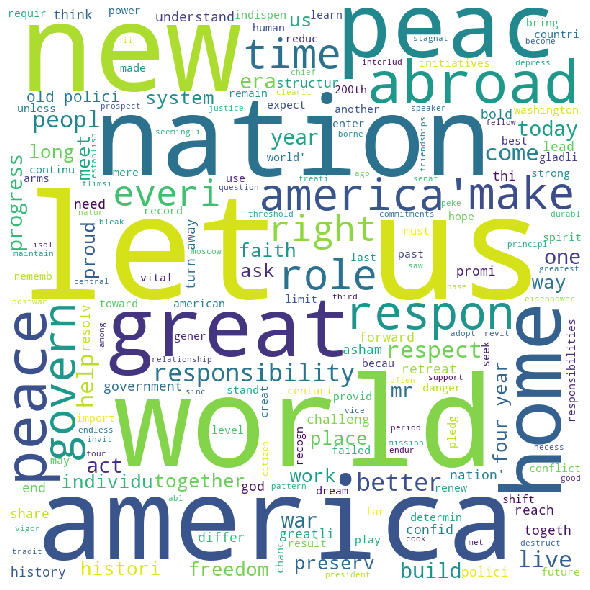

In [366]:
RO_SP = " ".join(Roosevelt['Speech_Processed'])

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(RO_SP) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

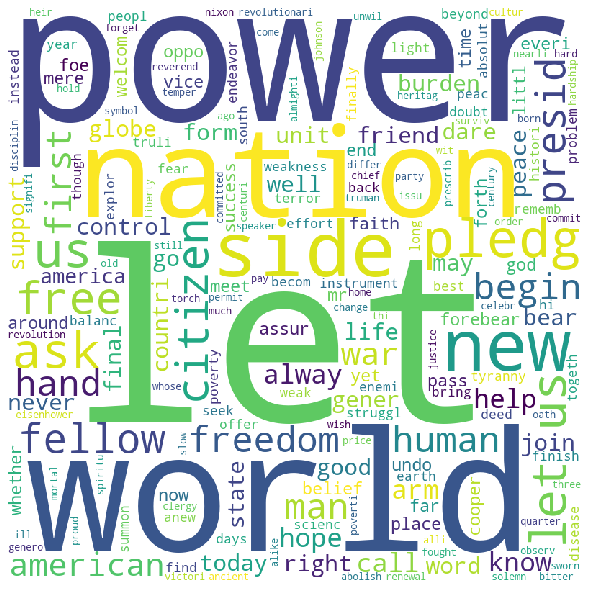

In [367]:
KE_SP = " ".join(Kennedy['Speech_Processed'])

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(KE_SP) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

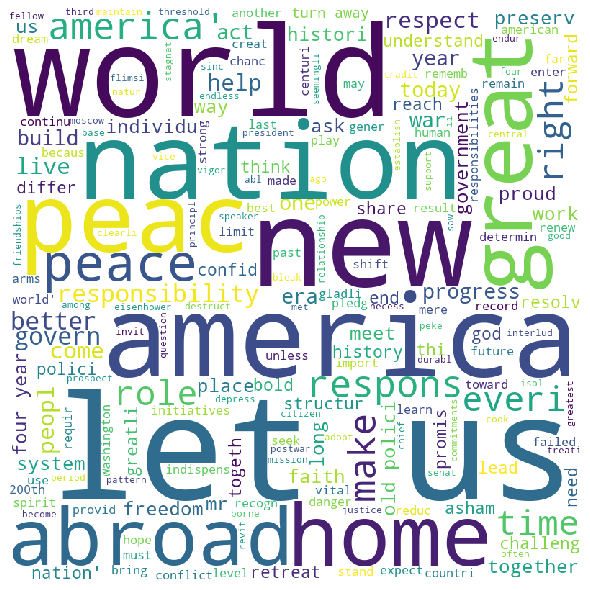

In [368]:
NI_SP = " ".join(Nixon['Speech_Processed'])

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(NI_SP) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()